In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import multivariate_normal as mvn, pearsonr

In [83]:
n1, n2 = 100, 100
n = n1 + n2
left_endpoint, right_endpoint = -3, 3
slope = 1.5
X2_offset = 1
X1 = np.random.uniform(low=left_endpoint, high=right_endpoint, size=n1)
X2 = np.random.uniform(low=left_endpoint - X2_offset, high=right_endpoint - X2_offset, size=n2)
Y1 = slope * X1 #+ np.random.normal(scale=1, size=n1)
Y2 = slope * (X2 + X2_offset) #+ np.random.normal(scale=1, size=n2)

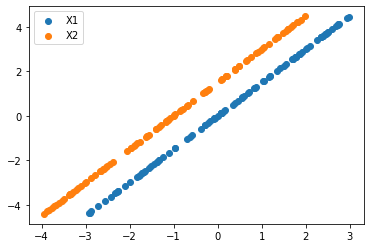

In [91]:
plt.scatter(X1, Y1, label="X1")
plt.scatter(X2, Y2, label="X2")
plt.legend()
plt.show()

In [85]:
# Compute likelihood under no transformation
K11 = np.outer(X1, X1)
K22 = np.outer(X2, X2)
K12 = np.outer(X1, X2)
K = np.block([[K11, K12], [K12.T, K22]]) + np.eye(n1 + n2)
Y = np.concatenate([Y1, Y2])
LL = mvn.logpdf(mean=np.zeros(n), cov=K, x=Y)
print("LL: {}".format(round(LL, 3)))

LL: -283.825


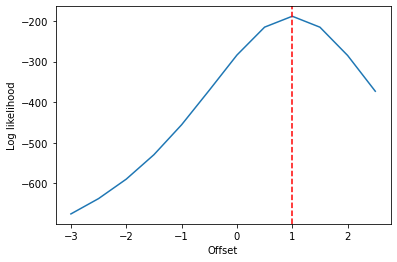

In [86]:
# Compute likelihood under a range of transformations

offset_list = np.arange(-3, 3, 0.5)
K11 = np.outer(X1, X1)
LLs = np.zeros(len(offset_list))

for ii, curr_offset in enumerate(offset_list):
    
    curr_X2 = X2 + curr_offset
    K22 = np.outer(curr_X2, curr_X2)
    K12 = np.outer(X1, curr_X2)
    K = np.block([[K11, K12], [K12.T, K22]]) + np.eye(n1 + n2)
    Y = np.concatenate([Y1, Y2])
    LL = mvn.logpdf(mean=np.zeros(n), cov=K, x=Y)
    LLs[ii] = LL
    
plt.plot(offset_list, LLs)
plt.axvline(X2_offset, color="red", linestyle="--")
plt.xlabel("Offset")
plt.ylabel("Log likelihood")
plt.show()


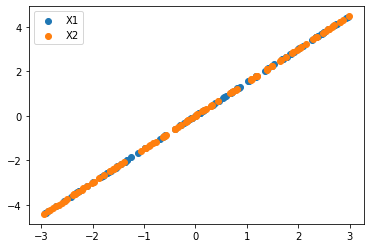

0.4104021735577133 -0.02711706194058984


In [92]:
best_offset = offset_list[np.argmax(LLs)]

plt.scatter(X1, Y1, label="X1")
plt.scatter(X2 + best_offset, Y2, label="X2")
plt.legend()
plt.show()
print(np.mean(Y1), np.mean(Y2))